# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [27]:
import pandas as pd
import numpy as np

In [28]:
x = 1.5 + 2.5 * np.random.randn(100)

In [29]:
res = 0 + 0.8 * np.random.randn(100)

In [30]:
y_pred = 5 + 0.3 * x

In [31]:
y_act = 5 + 0.3 * x + res

In [32]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [33]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [34]:
data.head()

,x,y_actual,y_prediccion
0,1.890000,5.863278,5.567000
1,-0.710676,4.873716,4.786797
2,0.994510,5.339443,5.298353
3,5.389467,5.082542,6.616840
4,-1.947704,4.010029,4.415689


In [35]:
import matplotlib.pyplot as plt

In [36]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

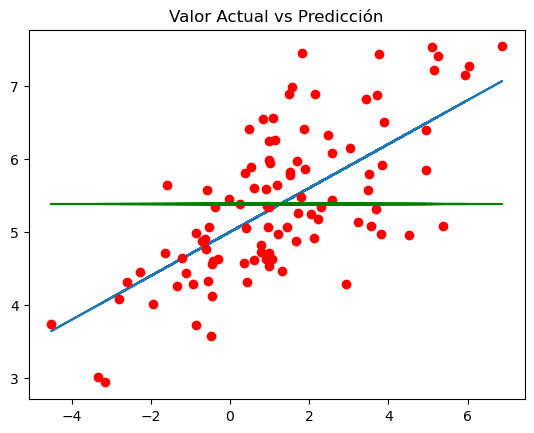

In [37]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [38]:
y_m = np.mean(y_act)#promedio
data["SSR"]=(data["y_prediccion"]-y_m)**2# entre la reggresion y el promedio 
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2 #La suma de los cuadrados  entre la diferencia de los puntos
data["SST"]=(data["y_actual"]-y_m)**2#la syma de los cuadrados totales

In [39]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,1.890000,5.863278,5.567000,0.032015,0.087780,0.225819
1,-0.710676,4.873716,4.786797,0.361533,0.007555,0.264564
2,0.994510,5.339443,5.298353,0.008050,0.001688,0.002365
3,5.389467,5.082542,6.616840,1.509868,2.354071,0.093349
4,-1.947704,4.010029,4.415689,0.945531,0.164560,1.899005


In [40]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [41]:
SSR

43.24222630590087

In [42]:
SSD

52.64512523388401

In [43]:
SST

102.07990107800607

In [44]:
SSR+SSD

95.88735153978487

In [45]:
R2 = SSR/SST

In [46]:
R2

0.42361156162226876

(array([ 1.,  7.,  4., 11., 19., 13., 22., 13.,  6.,  4.]),
 array([-1.90094509, -1.55252233, -1.20409957, -0.8556768 , -0.50725404,
        -0.15883128,  0.18959149,  0.53801425,  0.88643702,  1.23485978,
         1.58328254]),
 <BarContainer object of 10 artists>)

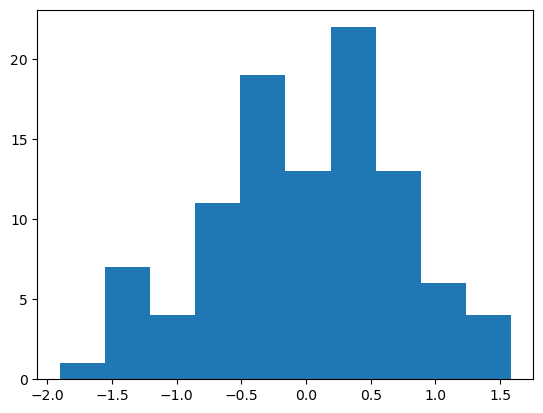

In [47]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [48]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.2633497008251555, 5.388073122288445)

In [49]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)#covarianza
data["beta_d"] = (data["x"]-x_mean)**2#varianza

In [50]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [51]:
alpha = y_mean - beta * x_mean

In [63]:
#estos son los parmetros que se usaran en el modelo y=a+bx
alpha, beta


(4.981853059413435, 0.3215420580775755)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [53]:
data["y_model"] = alpha + beta * data["x"]

In [54]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,1.890000,5.863278,5.567000,0.032015,0.087780,0.225819,0.297787,0.392691,5.589568
1,-0.710676,4.873716,4.786797,0.361533,0.007555,0.264564,1.015355,3.896777,4.753341
2,0.994510,5.339443,5.298353,0.008050,0.001688,0.002365,0.013074,0.072275,5.301630
3,5.389467,5.082542,6.616840,1.509868,2.354071,0.093349,-1.260657,17.024845,6.714793
4,-1.947704,4.010029,4.415689,0.945531,0.164560,1.899005,4.424973,10.310864,4.355584


In [55]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [56]:
SSR, SSD, SST

(49.665923346297106, 52.41397773170899, 102.07990107800607)

In [57]:
R2 = SSR / SST
R2

0.486539689221917

Text(0.5, 1.0, 'Valor Actual vs Predicción')

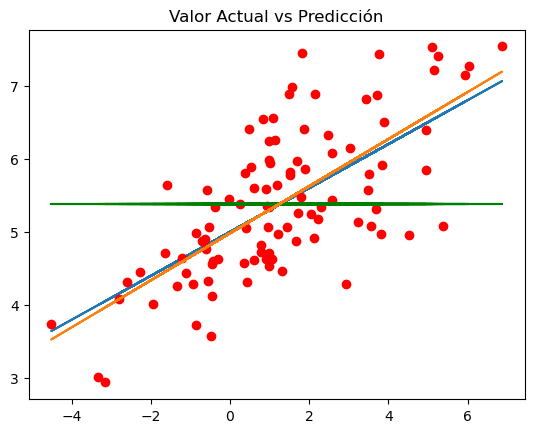

In [58]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [62]:
#NOTA:se debe comparar el RSE con el valor de la media  para validar cual es la 
#propporcion de la desviacion de los datos representados por el modelo
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7313251721815804

In [60]:
np.mean(data["y_actual"])

5.388073122288445

In [61]:
RSE / np.mean(data["y_actual"])

0.13573037254382492